In [1]:
import scipy
# https://docs.scipy.org/doc/scipy/reference/index.html
import numpy as np
import matplotlib.pyplot as plt

# Interpolate

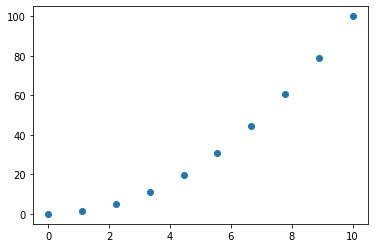

In [2]:
x = np.linspace(0,10,10)
y = x**2
plt.scatter(x,y)

In [3]:
from scipy.interpolate import interp1d
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

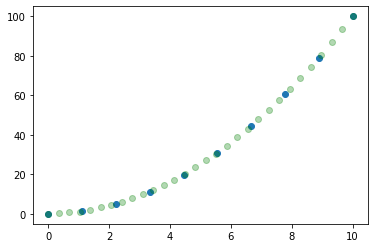

In [4]:
# Interpolation de type linéaire
f = interp1d(x,y, kind='linear')

new_x = np.linspace(0,10,30)
result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x,result,c='green',alpha=0.3)

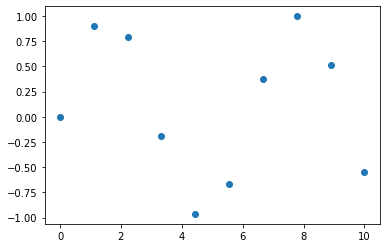

In [5]:
x_bis = np.linspace(0,10,10)
y_bis = np.sin(x_bis)
plt.scatter(x_bis,y_bis)

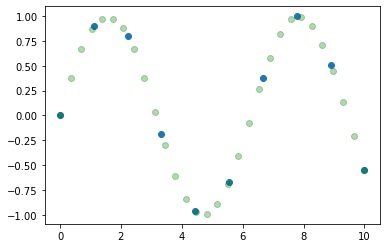

In [6]:
# Interpolation de type cubic
# Il faut donc bien choisir son interpolation en fonction de nos points
f = interp1d(x_bis,y_bis, kind='cubic')

new_xbis = np.linspace(0,10,30)
resultbis = f(new_xbis)

plt.scatter(x_bis,y_bis)
plt.scatter(new_xbis,resultbis,c='green',alpha=0.3)

# Optimize

In [7]:
from scipy import optimize
# https://docs.scipy.org/doc/scipy/reference/optimize.html

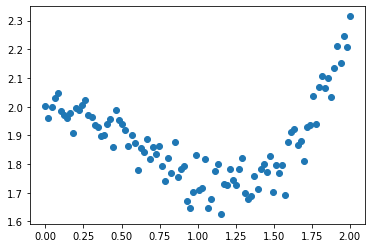

In [8]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [9]:
# On peut utiliser la fonction curve_fit qui utilise la fonction des moindres carrés
# pour trouver les bons paramètres d'un modèle f
def f(x,a,b,c,d):
    return a * x**3 + b * x**2 + c * x + d

In [10]:
params, param_cov = optimize.curve_fit(f, x, y)

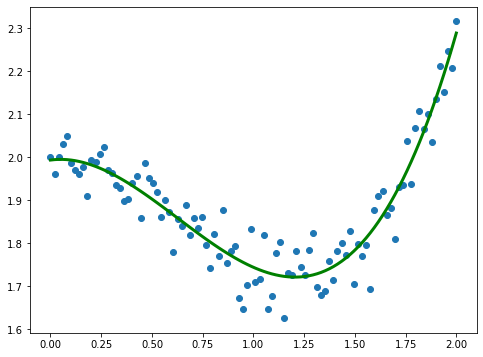

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.plot(x,f(x,params[0],params[1],params[2],params[3]), c='green', lw=3)

# Minimize

In [12]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

def f(x):
    return x**2 + 15 * np.sin(x)

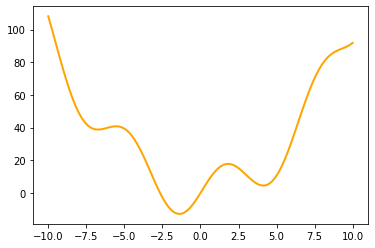

In [13]:
x = np.linspace(-10,10,100)
plt.plot(x,f(x), c='orange', lw=2)

In [14]:
x0 = 0
result = optimize.minimize(f,x0).x

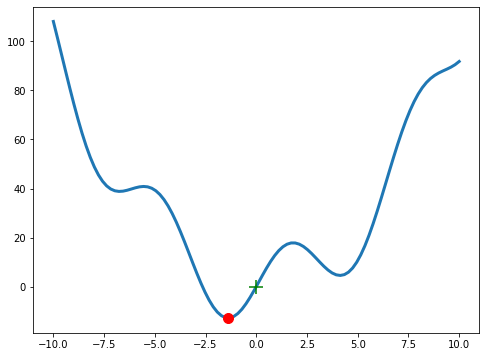

In [15]:
plt.figure(figsize=(8,6))
plt.plot(x,f(x), lw=3,zorder=-1)
plt.scatter(result,f(result),s=100,c='red', zorder=1)
plt.scatter(x0, f(x0),s=200,marker='+',c='green')
plt.show()

In [16]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])* np.cos(x[0])

[-0.78539917 -2.35619341]


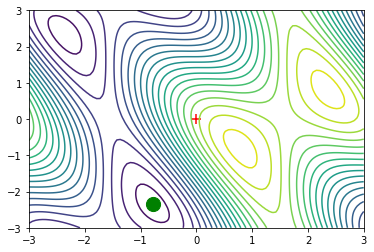

In [17]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

x,y = np.meshgrid(x,y)
plt.contour(x,y,f(np.array([x,y])),20)

x0 = np.zeros((2,1))
x0 = x0.reshape(-1)
plt.scatter(x0[0],x0[1], marker='+', c='red', s=100)

result = optimize.minimize(f,x0=x0).x
plt.scatter(result[0],result[1],c='green', s=200)
print(result)

# Traitement du signal

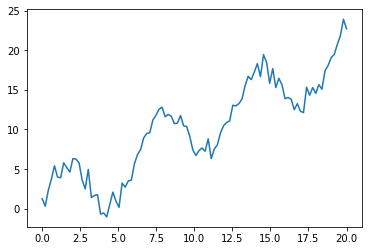

In [18]:
x = np.linspace(0,20,100)
y = x + 4 * np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

In [19]:
x

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [20]:
from scipy import signal

In [21]:
# Permet de "supprimer" la tendance linéaire d'une courbe
new_y = signal.detrend(y)

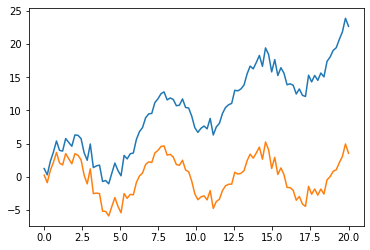

In [22]:
plt.plot(x,y)
plt.plot(x,new_y)

# Transformation de Fourier

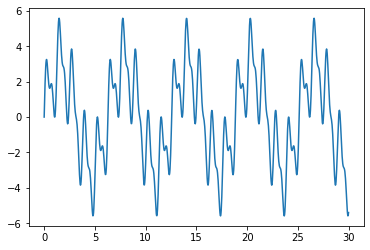

In [23]:
# La transformation de fourier est une technique mathématiques qui permet d'extraire et d'analyser les fréquences
# qui sont présentes dans un signal périodique
x = np.linspace(0,30,1000)
y = 3 * np.sin(x) + 2 * np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)

In [24]:
from scipy import fftpack

In [25]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)

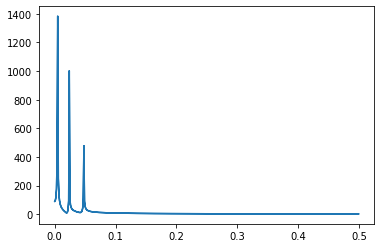

In [26]:
plt.plot(np.abs(frequences),power)

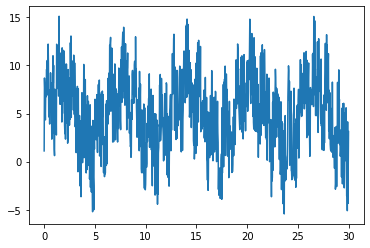

In [27]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)

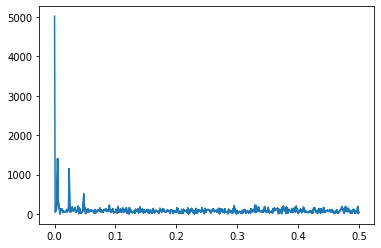

In [28]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences),power)

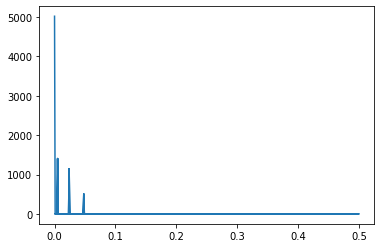

In [29]:
#On nettoie le bruit du signal en écartant les valeurs qui sont inférieurs à 400
fourier[power<400] = 0
plt.plot(np.abs(frequences),np.abs(fourier))

In [30]:
# On utilise la transformation de fourier inverse pour retomber sur le signal d'origine
filtered_signal = fftpack.ifft(fourier)

c:\users\pihaugue\appdata\local\programs\python\python38\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


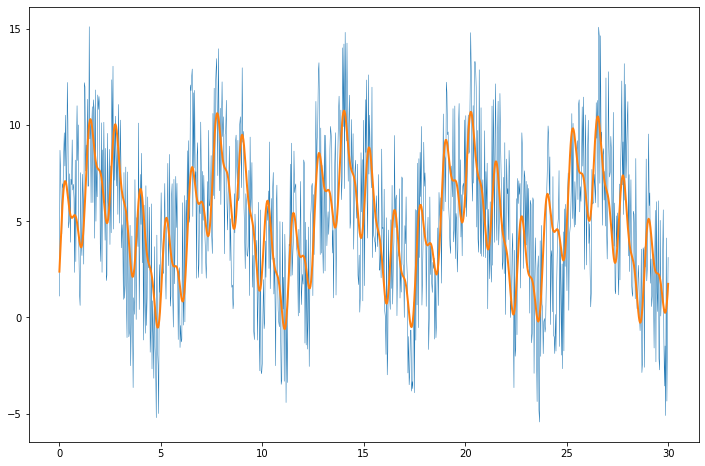

In [31]:
plt.figure(figsize=(12,8))
plt.plot(x,y, lw=0.5)
plt.plot(x,filtered_signal,lw=2)
plt.show()

# Image processing

In [32]:
from scipy import ndimage

<span style='font-family:Helvetica'>La **morphologie** est une technique qui permet de *transformer* une matrice (et donc une image) par le *déplacement d'une structure* sur chaque pixel de l'image. Lorsqu'un pixel \"blanc\" est visité, la structure peut effectuer une opération:

- de **dilation**: imprime des pixels
- **d'érosion** : efface des pixels

Cette technique peut-etre utile pour nettoyer une image des artefacts qui peuvent la composer.

*Pour information* : Sur une image numérique, un artefact désigne tout pixel dont la couleur a été générée de manière aléatoire

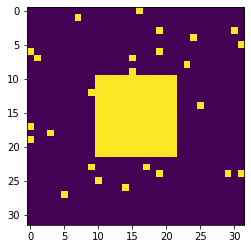

In [33]:
# Création d'une image avec quelques artefacts
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 #ajout d'artefacts aléatoires
plt.imshow(X)

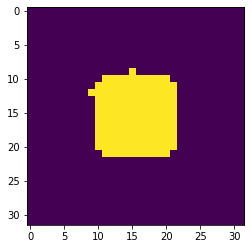

In [34]:
# opération de binary_opening = érosion puis dilation
open_X = ndimage.binary_opening(X)
plt.imshow(open_X)

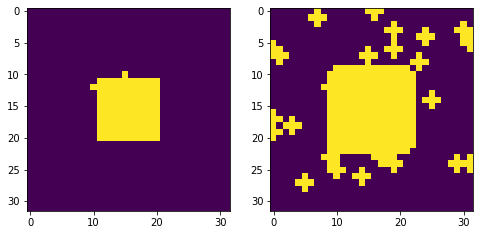

In [35]:
# On peut également seulement faire la manipulation d'érosion ou dilatation comme ceci : 
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
# - Erosion
eros_x = ndimage.binary_erosion(X)
plt.imshow(eros_x)
plt.subplot(1,2,2)
# - Dilatation
dilat_x = ndimage.binary_dilation(X)
plt.imshow(dilat_x)

# On observe que l'érosion seulement a permis de nettoyer de manière plus précise notre carré.
# Nous gardons tout de même deux petits rectangles supplémentaires, mais le résultat est tout de même très satisfant
# Ces petites imperfections sont le "coût" à payer de l'utilisation de cette algorithme, qui reste tout de même très puissant.

(507, 537)

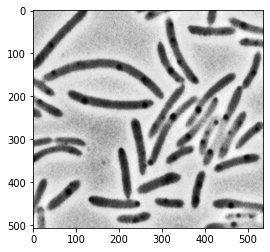

In [36]:
# importer l'image avec pyplot
image = plt.imread('data/bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

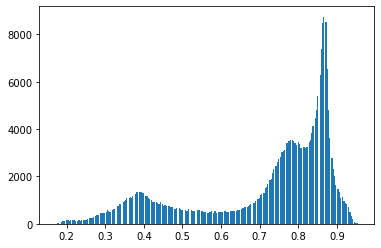

In [37]:
# copy de l'image, puis création d'un histogramme en utilisant la fonction "ravel" qui permet d'aplatir
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()
# Les 3 pics représentent 3 "groupes" différents de notre image qui sont : les couleurs sombres, les couleurs gris claires,
# et le blanc

In [38]:
# boolean indexing: création d'une image binaire
# On récupère donc les valeurs < 0.5 ce qui correspond à nos pixels sombres : l'objectif ici étant de déterminer la taille
# des cellules de la bactérie
image= image<0.6
# le résultat du calcul ci-dessous est un masque, indiquant si "vrai" ou "faux" le critère est respecté
image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

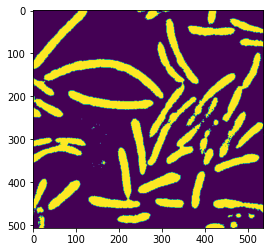

In [39]:
# Ce masque est une représentation binaire, on peut donc tout à fait la représenter graphiquement : 
plt.imshow(image)

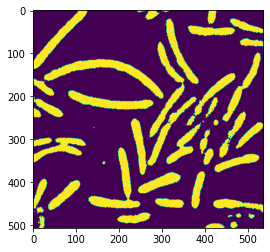

In [40]:
# morphologie utilisée pour enlever les artefacts (les petits parasites)
#  on applique le binary_opening (erosion + dilatation)
open_image = ndimage.binary_opening(image)
plt.imshow(open_image)

In [41]:
# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')

il y a 53 groupes


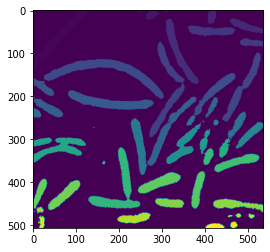

In [42]:
# Visualisation de l'image étiquetée
plt.imshow(label_image)

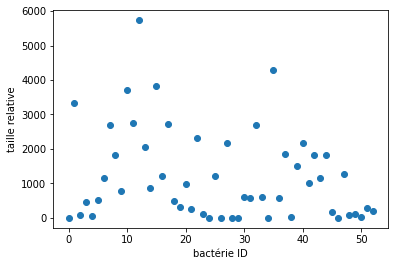

In [43]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
# La fonction sum permet de compter tous les pixels qu'il y a dans chaque groupe d'image
# Cela permet ainsi de mesurer la taille "relative" de chaque bactérie
sizes = ndimage.sum(open_image, label_image, range(n_labels))

# Visualisation des résultats
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()